## 0. What We Are Going To Do:
We are going to classify images of handwritten digits (MNIST dataset) using a fully-connected neural network.

![MLNN](img/mlp.png)

After successful training, our model will be able to guess the digit in the image.

** In this section we import all the packages you need(You may edit & rerun this part later)**

Note: You can also import classes/functions within a package directly (e.g. from keras.layers import Dense).


In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## 1. Prepare Data:

The dataset is loaded in this section. 

**1-0. Check the dimensions of data and its minimum & maximum.**

Note: You should paste the dataset file in '~/.keras/datasets/' directory or it will start downloading it.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print('train data dim:', x_train.shape)
# Print x_test and y_test dimensions
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)
# Question: How many train/test samples does it have?

# Print the minimum and maximum of x_train and x_test(use numpy min and max functions)
print('max of train data:',np.max(x_train))
print('min of train data:',np.min(x_train))
print('max of test data:',np.max(x_test))
print('min of test data:',np.min(x_test))


train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of train data: 255
min of train data: 0
max of test data: 255
min of test data: 0


** 1-1. Check a random sample of train data and its label. **

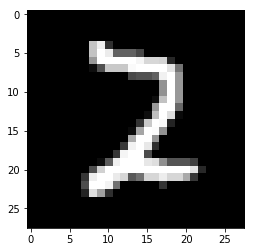

label: 2


In [4]:
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

**1-2. Our Network accept 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.**

Use numpy reshape function.


In [5]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

** 1-3. Normalize data by rescaling them to (0,1) **

In [6]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

** 1-4. Convert label arrays to 1-hot representation **

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


## 2. Define Model

** 2-0. Add the following layers to the network:**
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition

In [8]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

** 2-1. Determine loss function, optimizer and metrics for the model **

In [9]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

** 2-2. Print the review of the model **

In [10]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________



## 3. Train And Evaluate Model. 

** 3-0. Train model on training data using model.fit for 5 epoch**

In [11]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 3,
                    verbose = 1,
                    validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 8s 165us/step - loss: 2.2137 - acc: 0.2416 - val_loss: 1.7148 - val_acc: 0.5597
Epoch 2/3
48000/48000 [==============================] - 8s 159us/step - loss: 0.8522 - acc: 0.7613 - val_loss: 0.5015 - val_acc: 0.8601
Epoch 3/3
48000/48000 [==============================] - 8s 173us/step - loss: 0.4548 - acc: 0.8686 - val_loss: 0.3785 - val_acc: 0.8932


** 3-1. Evaluate model on test data using model.evaluate. Print the model accuracy on test set. **

In [12]:
te_score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', te_score[0])
print('Test accuracy:', te_score[1])

Test Loss: 1.8171926141381354
Test accuracy: 0.8848


** 3-2. Save model **

In Keras, you can save the model to a HDF5 file(.h5) and reload it later simply by model.save(filepath) and keras.models.load_model(filepath), respectively.

The saved model contains:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [13]:
# save model here:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

** 3-3. Load model and Predict label for a random image in train set. Verify predicted label by ploting the image. **

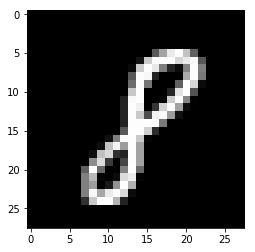

True label: 8
Predicted label: 8


In [14]:
# reload the model here:
model = load_model('mlp.h5')
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
img = x_train[rand_num]
img = np.expand_dims(img, axis = 0)
predicted_label =model.predict(img, 1)
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray' )
plt.show()
# print its label
true_label = np.argmax(y_train[rand_num])
predicted_label = np.argmax(predicted_label)
print('True label:', true_label)
print('Predicted label:', predicted_label)

#### ** 3-4. Continue training + Callbacks **

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 166us/step - loss: 0.3737 - acc: 0.8934 - val_loss: 0.3296 - val_acc: 0.9058
Epoch 2/100
48000/48000 [==============================] - 8s 166us/step - loss: 0.3327 - acc: 0.9049 - val_loss: 0.2998 - val_acc: 0.9141
Epoch 3/100
48000/48000 [==============================] - 8s 164us/step - loss: 0.3012 - acc: 0.9145 - val_loss: 0.2762 - val_acc: 0.9211
Epoch 4/100
48000/48000 [==============================] - 8s 162us/step - loss: 0.2728 - acc: 0.9221 - val_loss: 0.2451 - val_acc: 0.9310
Epoch 5/100
48000/48000 [==============================] - 8s 162us/step - loss: 0.2464 - acc: 0.9294 - val_loss: 0.2288 - val_acc: 0.9348
Epoch 6/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.2229 - acc: 0.9358 - val_loss: 0.2062 - val_acc: 0.9431
Epoch 7/100
48000/48000 [==============================] - 8s 177us/step - loss: 0.2028 - acc: 0.9427 - val_loss: 0.

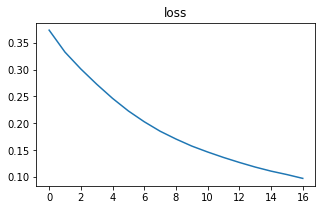

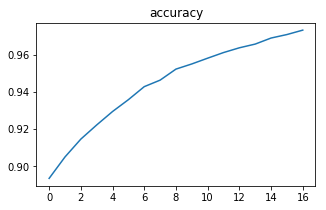

In [15]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, min_delta=0.01, patience = 2, mode= 'min' ),
            keras.callbacks.CSVLogger('log.csv')]
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    validation_split = 0.2,
                    callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [18]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph')

model.fit(x_train, y_train, verbose=1, callbacks=[tensor_board], epochs=10)


Epoch 1/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0888 - acc: 0.9749
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0834 - acc: 0.9768
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0777 - acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0734 - acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0687 - acc: 0.9814
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0645 - acc: 0.9828
Epoch 7/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0610 - acc: 0.9835
Epoch 8/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0574 - acc: 0.9845
Epoch 9/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0543 - acc: 0.9851
Epoch 10/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.051

In [24]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

## 4. Extras

** 4-0. Initialization is important! **

Redefine Network, this time use mean=0 and std=1 for initialization.

Then Try to fit the model.

Do it with other initialization method and observe the result.

In [16]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,1)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,1)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,1)))
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 2,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 13.4791 - acc: 0.1636 - val_loss: 13.1137 - val_acc: 0.1864
Epoch 2/10
 - 11s - loss: 13.2294 - acc: 0.1792 - val_loss: 13.1169 - val_acc: 0.1862
Epoch 3/10
 - 11s - loss: 13.1447 - acc: 0.1844 - val_loss: 13.0315 - val_acc: 0.1915
Epoch 4/10
 - 11s - loss: 12.4502 - acc: 0.2273 - val_loss: 11.8661 - val_acc: 0.2638
Epoch 5/10
 - 11s - loss: 11.8366 - acc: 0.2655 - val_loss: 11.7243 - val_acc: 0.2726
Epoch 6/10
 - 11s - loss: 11.7423 - acc: 0.2714 - val_loss: 11.6647 - val_acc: 0.2763
Epoch 7/10
 - 11s - loss: 11.7589 - acc: 0.2704 - val_loss: 11.6614 - val_acc: 0.2765
Epoch 8/10
 - 11s - loss: 11.8000 - acc: 0.2679 - val_loss: 12.0499 - val_acc: 0.2524
Epoch 9/10
 - 11s - loss: 11.6928 - acc: 0.2745 - val_loss: 11.6308 - val_acc: 0.2784
Epoch 10/10
 - 11s - loss: 11.6474 - acc: 0.2773 - val_loss: 11.5889 - val_acc: 0.2810


** 4-1. Overfitting/Underfitting **

Load the 'raw_model.h5' and this time use 1 percent of training data for training, and all test data for validation.

Observe the result.

In [17]:
del model

model = load_model('raw_model.h5')
history = model.fit(x_train[:600], y_train[:600],
                    batch_size = 32,
                    epochs = 10,
                    verbose = 2,
                    validation_data=(x_test,y_test))

Train on 600 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 2.3024 - acc: 0.1517 - val_loss: 2.5574 - val_acc: 0.1078
Epoch 2/10
 - 1s - loss: 2.3017 - acc: 0.1517 - val_loss: 2.4803 - val_acc: 0.1312
Epoch 3/10
 - 1s - loss: 2.3010 - acc: 0.1333 - val_loss: 2.4089 - val_acc: 0.1645
Epoch 4/10
 - 1s - loss: 2.3003 - acc: 0.1317 - val_loss: 2.3428 - val_acc: 0.2010
Epoch 5/10
 - 1s - loss: 2.2996 - acc: 0.1317 - val_loss: 2.2826 - val_acc: 0.2341
Epoch 6/10
 - 1s - loss: 2.2989 - acc: 0.1317 - val_loss: 2.2292 - val_acc: 0.2587
Epoch 7/10
 - 1s - loss: 2.2983 - acc: 0.1317 - val_loss: 2.1799 - val_acc: 0.2755
Epoch 8/10
 - 1s - loss: 2.2976 - acc: 0.1317 - val_loss: 2.1384 - val_acc: 0.2879
Epoch 9/10
 - 1s - loss: 2.2969 - acc: 0.1317 - val_loss: 2.1035 - val_acc: 0.2992
Epoch 10/10
 - 1s - loss: 2.2963 - acc: 0.1317 - val_loss: 2.0750 - val_acc: 0.3066


Now create another fully-connected model with 1 hidden layer(10 Neurons). Use all training data for training this model.

Observe the result.

In [18]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(5, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,1)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,1)))
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 2,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 2.7879 - acc: 0.2401 - val_loss: 4.9246 - val_acc: 0.2923
Epoch 2/10
 - 2s - loss: 1.9179 - acc: 0.3283 - val_loss: 6.3385 - val_acc: 0.3715
Epoch 3/10
 - 2s - loss: 1.6574 - acc: 0.3966 - val_loss: 6.9286 - val_acc: 0.3859
Epoch 4/10
 - 2s - loss: 1.4855 - acc: 0.4587 - val_loss: 8.2250 - val_acc: 0.4244
Epoch 5/10
 - 2s - loss: 1.3615 - acc: 0.5057 - val_loss: 8.3299 - val_acc: 0.4497
Epoch 6/10
 - 2s - loss: 1.2574 - acc: 0.5464 - val_loss: 8.0134 - val_acc: 0.4806
Epoch 7/10
 - 2s - loss: 1.1718 - acc: 0.5821 - val_loss: 7.8156 - val_acc: 0.4996
Epoch 8/10
 - 2s - loss: 1.1013 - acc: 0.6109 - val_loss: 7.6681 - val_acc: 0.5133
Epoch 9/10
 - 2s - loss: 1.0430 - acc: 0.6340 - val_loss: 7.2913 - val_acc: 0.5396
Epoch 10/10
 - 2s - loss: 0.9942 - acc: 0.6531 - val_loss: 7.2627 - val_acc: 0.5422
